In [20]:
import numpy as np
from qiskit import *
from qiskit.circuit import Gate
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline

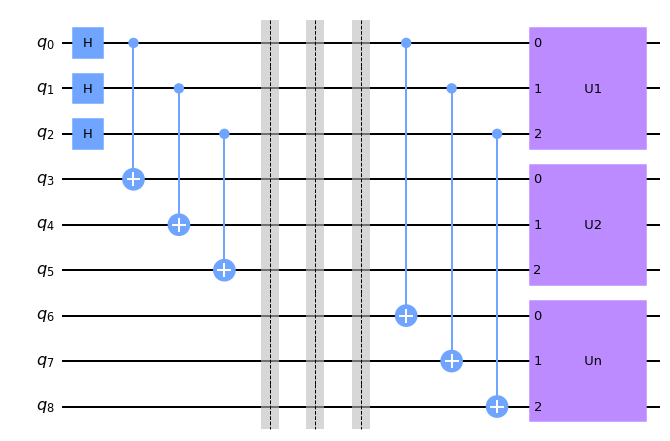

In [21]:
qr = QuantumRegister(9, 'q')
my_gate = Gate(name='          U1          ', num_qubits=3, params=[])
my_gate2 = Gate(name='          U2          ', num_qubits=3, params=[])
my_gate3 = Gate(name='          Un          ', num_qubits=3, params=[])

circ = QuantumCircuit(qr)

circ.h(0)
circ.h(1)
circ.h(2)

circ.cx(0,3)
circ.cx(1,4)
circ.cx(2,5)

circ.barrier()
circ.barrier()
circ.barrier()

circ.cx(0,6)
circ.cx(1,7)
circ.cx(2,8)

circ.append(my_gate, qr[0:3])
circ.append(my_gate2, qr[3:6])
circ.append(my_gate3, qr[6:9])

circ.draw(output='mpl')

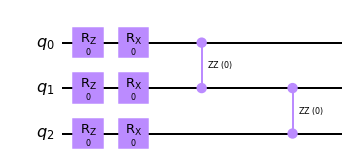

In [22]:
qr2 = QuantumRegister(3, 'q')


circ = QuantumCircuit(qr2)

circ.rz(0,0)
circ.rz(0,1)
circ.rz(0,2)

circ.rx(0,0)
circ.rx(0,1)
circ.rx(0,2)

circ.rzz(0,1,0)
circ.rzz(0,1,2)




circ.draw(output='mpl')

In [23]:
#Examples of other information we would be able to get if given the parameterized circuits U:

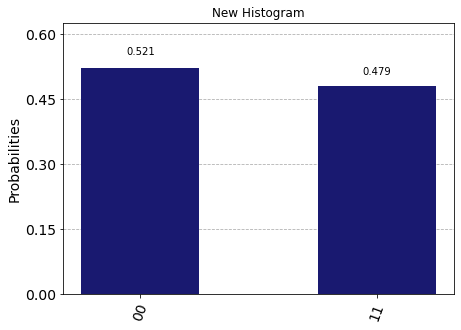

In [24]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="New Histogram")

{'11': 516, '00': 484}


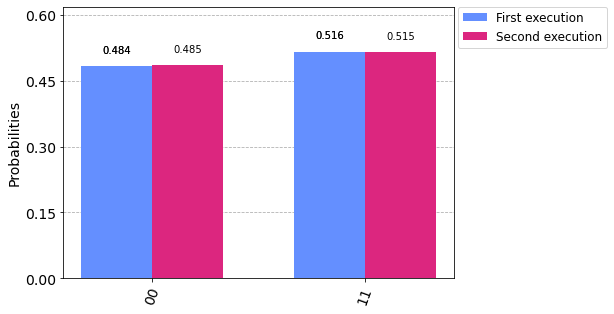

In [25]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

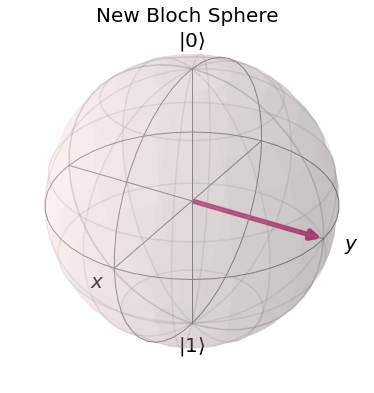

In [26]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0,1,0], title="New Bloch Sphere")

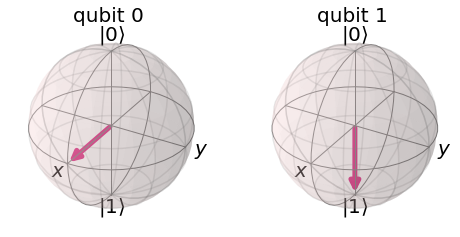

In [27]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)

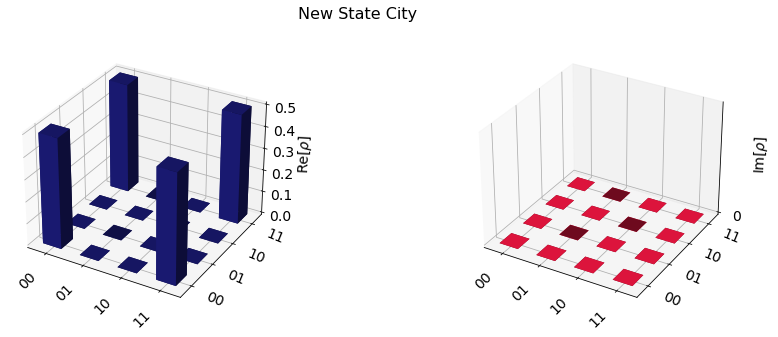

In [28]:
# You can choose different colors for the real and imaginary parts of the density matrix.

from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = DensityMatrix(qc)
plot_state_city(state, color=['midnightblue', 'crimson'], title="New State City")

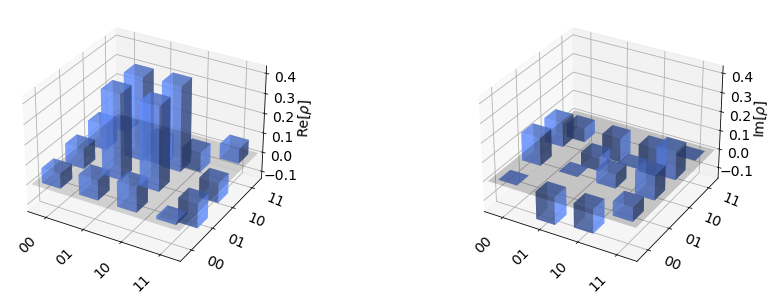

In [29]:
# You can make the bars more transparent to better see the ones that are behind
# if they overlap.

import numpy as np
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)

state = Statevector(qc)
plot_state_city(state, alpha=0.6)

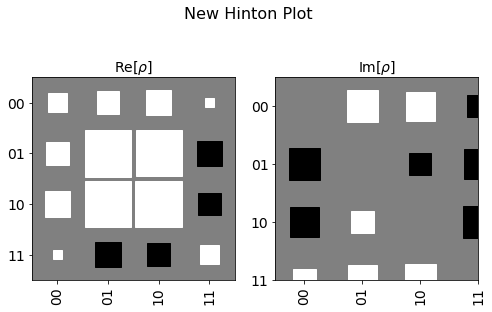

In [30]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_hinton

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3 , 0)
qc.rx(np.pi/5, 1)

state = DensityMatrix(qc)
plot_state_hinton(state, title="New Hinton Plot")

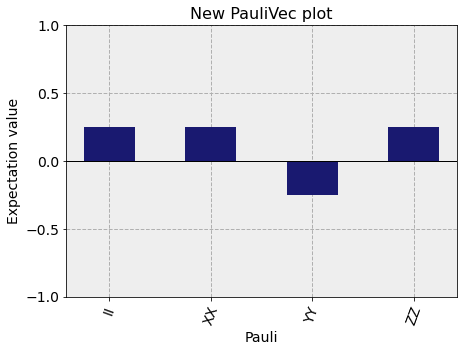

In [31]:
# You can set a color for all the bars.

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
plot_state_paulivec(state, color='midnightblue', title="New PauliVec plot")

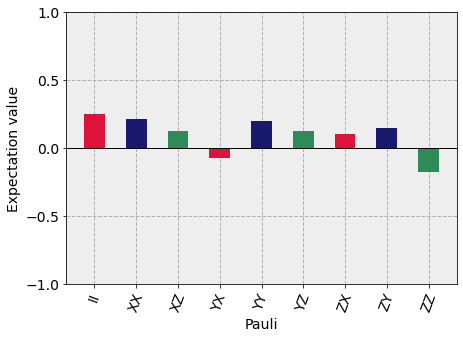

In [32]:
# If you introduce a list with less colors than bars, the color of the bars will
# alternate following the sequence from the list.

import numpy as np
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0, 1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)

matrix = DensityMatrix(qc)
plot_state_paulivec(matrix, color=['crimson', 'midnightblue', 'seagreen'])

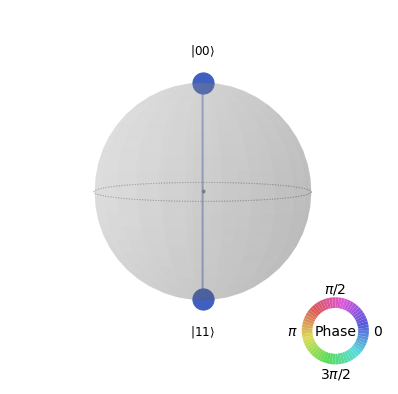

In [33]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector(qc)
plot_state_qsphere(state)

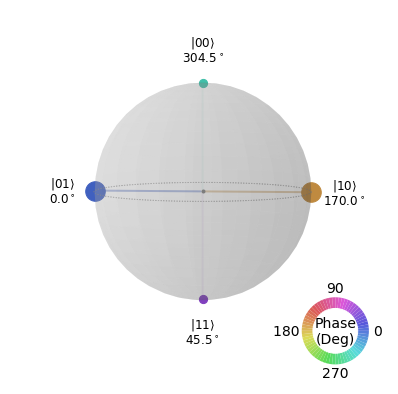

In [34]:
# You can show the phase of each state and use
# degrees instead of radians

from qiskit.quantum_info import DensityMatrix
import numpy as np

qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
qc.z(1)

matrix = DensityMatrix(qc)
plot_state_qsphere(matrix,
     show_state_phases = True, use_degrees = True)

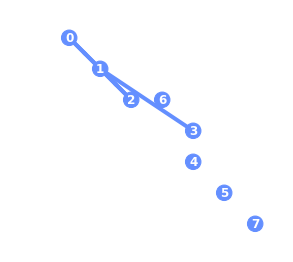

In [35]:
from qiskit.visualization import plot_coupling_map
%matplotlib inline

num_qubits = 8
coupling_map = [[0, 1], [1, 2], [2, 3], [3, 5], [4, 5], [5, 6], [2, 4], [6, 7]]
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
plot_coupling_map(num_qubits, coupling_map, qubit_coordinates)

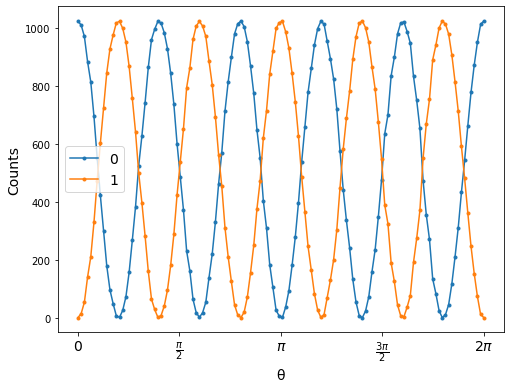

In [36]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw()

backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)